Files already downloaded and verified
Files already downloaded and verified
cattle dinosaur apple   boy


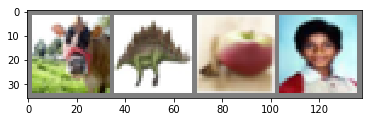

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [5]:
# %load C:\Pytorch\Section2\prep.py
"""
Get and prepare the CIFAR100 dataset and its classes
To train a custom CNN Beaver detector.
"""
#  to generate reproducible random numbers we give hard coded numbers
import torch
torch.manual_seed(1)
#  Transforms are used for Common Image Transformations and utils to make a grid of images
from torchvision import transforms, utils
# Import dataset named CIFAR100
from torchvision.datasets import CIFAR100
# Combines dataset and sampler
from torch.utils.data import DataLoader
# to plot data
import matplotlib.pyplot as plt
#  for Scientific calculations
import numpy as np
#  Used for serializing and deserializing a python object
import pickle

def get_data(batch_size=4, transform=None):
    """
    Get training and test sets ready to use
    with the network.

    Return also the class names/labels that are
    available in the dataset.

    batch_size   a number of samples to split our dataset into
    transform   transform.Compose, list of transforms to do on each image
    """
    trainset = CIFAR100(root='./data', train=True, download=True, transform=transform)
	# Data loader. Combines a dataset and a sampler, and provides single  or multi process iterators over the dataset.
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=False, num_workers=2)

    testset = CIFAR100(root='./data', train=False, download=True, transform=transform)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    # After data has been downloaded we can access the mapping
    # between class indexes and the name of the classes.
    classes=pickle.load(open('./data/cifar-100-python/meta', 'rb'))
    classes=classes['fine_label_names']

    return trainloader, testloader, classes

def imshow(img):
    """
    Show images.
    """
    # Since we've already transformed
    # our images we need to "undo" it
    # simple to make them more visible.
	# to get the image back in [0,1] range,use,
	#image = ((image * std) + mean)
    img = img / 2 + 0.5
	# convert to numpy
    npimg = img.numpy()
	# permute axes according to the values
    npimg=np.transpose(npimg, (1, 2, 0))
    plt.imshow(npimg)
    plt.show()

def show(trainloader,classes,batch_size=4):
    """
    Show some images from training set.
    """
    # Turn data loader to interator,so
    # To get some images.
    dataiter = iter(trainloader)
    # Get a single batch (4 images).
    images, labels = dataiter.next()
    # Show the name of the classes for those images.
    print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
    # Show images.
    imshow(utils.make_grid(images))

# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [ 1, 1].
beavernet_transform = transforms.Compose([
#  transform image to tensor
 transforms.ToTensor(),
#  normalize mean, standard deviation
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

alexnet_transform = transforms.Compose([
 transforms.Resize(226),
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

if __name__ == '__main__':
	#  a “pretty printer” for producing aesthetically pleasing representations of your data structures
    from pprint import pprint
	#  function call to get trainloader,testloader and classes
    trs, ts, classes = get_data(transform=beavernet_transform)
	# show images
    show(trs, classes)
    pprint(classes)
    print('Number of classes:', len(classes))
    print("Where's the beaver?")
    print(classes.index('beaver'))


In [19]:
# %load C:\Pytorch\Section2\train.py
"""
Train a custom CNN network using CIFAR100 dataset.
"""
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os.path
from torchvision import models

#from prep import get_data,beavernet_transform,alexnet_transform

class BeaverNet(nn.Module):
    """
    Since training AlexNet is time consuming,
    we will use a much simpler CNN architecture.
    """
    def __init__(self, num_classes=100):
		#-object
        super(BeaverNet, self).__init__()
		#-2d Convolution 3 rows,6 colums and 5 channels
        self.conv1 = nn.Conv2d(3, 6, 5)
		#-max pooling size- with max value and size
        self.pool = nn.MaxPool2d(2, 2)
		#-2d Convolution
        self.conv2 = nn.Conv2d(6, 16, 5)
		#-Linear-In features or size,out features or size and bias-bool-optional-to relearn additive bias
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 110)
        self.fc3 = nn.Linear(110, num_classes)

    def forward(self, x):
		#-conv 1-->relu-->Max pool 2 times to reduce size
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
		#-to resize image and output size- -1 for dynamic allocation of size
        x = x.view(-1, 16 * 5 * 5)
		# - apply relu function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train_nn(net, epochs, trainloader, loss_function, optimizer):
    """
    Train net epochs number of times using data from trainloader
    and use loss_function and optimizer to get better.
    """
	#-number of iterations
    for epoch in range(epochs):
        print('Epoch:', epoch+1)
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # Get one batch of both images and labels.
            images, classes = data

            # Forward pass: predict classes for a given image.
            outputs = net(images)

            # Calculate the difference between
            # what we've predicted and what we should
            # predict.
            loss = loss_function(outputs, classes)

            # Because changes('gradients') are accumulated
            # from one iteration to another we need to
            # clean up the last ones, so we can propagate
            # the ones from this iteration.
            # Note: always call it before
            # loss.backward() and optimizer.step()
            optimizer.zero_grad()

            # Backward pass: accumulate changes('gradients')
            # that we've learned about in this iteration.
            loss.backward()

            # Backward pass: propagate changes trough the network.
            optimizer.step()

            running_loss += loss.item()
            if i % 2000 == 1999:
                print('[%d, %d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Trained on %d images' % i)

def test_nn(net, testloader, classes, batch_size=4):
    """
    Quickly test net on a small amount of data.
    """
    # Get the first image from a test data set
    dataiter = iter(testloader)
    images, labels = dataiter.next()
    print('Trying to predict ')
    print(' '.join(['%s' % classes[labels[j]] for j in range(batch_size)]))
    # Feed the image to the network and
    # get the classified classes.
    outputs = net(images)
    # Get the most probable classes first.
    _, predicted = torch.max(outputs, 1)
    print('Predicted: ')
    print(' '.join(['%s' % classes[predicted[j]] for j in range(batch_size)]))

def test_nn_all(net, testloader):
    """
    Test data on all test dataset, calculate how
    much images have been classified correctly.
    """
    correct = 0
    total = 0
    # When testing we don't need to adjust
    # the network parameters, so we can
    # turn off accumulating changes('gradients').
    # (this will save us memory)
    with torch.no_grad():
        for i, data in enumerate(testloader):
            # Get a single batch of images
            # and associated classes.
            images, classes = data
            # Feed the network with those images
            # to check how they will be classified.
            outputs = net(images)
            # Get the most probable classes first.
            _, predicted = torch.max(outputs.data, 1)
            # Add current number images we process to the total.
            total += len(images)
            # How much images were classified correctly?
            correct += (predicted == classes).sum().item()

    print('Test accuracy on %d test images: %d %%' % (i, 100 * correct / total))

if __name__ == '__main__':
    from sys import argv
    epochs=5
    # To train models defined in pytorch
    # use get_data(transform=alexnet_transform)
    # and get_nn(models.alexnet(num_classes=100))
	#-refer prep.py
    train, test, classes=get_data(transform=beavernet_transform)
	#-Beavernet object creation
    net=BeaverNet(num_classes=100)
	#-measures log loss-loss will be 0 in ideal scenario
    loss_function = nn.CrossEntropyLoss()
	#-optimize using adam algorithm-comparable to best known algo-pass parameters
    optimizer = optim.Adam(net.parameters())
	#-using train dataset to train model
    train_nn(net, epochs, train, loss_function, optimizer)
	#-using test dataset to predict image
    test_nn(net, test, classes)
	#-using test dataset to predict image for whole data and find accuracy
    test_nn_all(net, test)
	#-save trained model in model.ckpt by serializing it using pickle,state_dict contains all the learned parameters
    torch.save(net.state_dict(), 'model.ckpt')
    print('Model saved in model.ckpt')


Files already downloaded and verified
Files already downloaded and verified
Epoch: 1
[1, 2000] loss: 4.360
[1, 4000] loss: 4.036
[1, 6000] loss: 3.889
[1, 8000] loss: 3.767
[1, 10000] loss: 3.698
[1, 12000] loss: 3.644
Epoch: 2
[2, 2000] loss: 3.597
[2, 4000] loss: 3.519
[2, 6000] loss: 3.487
[2, 8000] loss: 3.406
[2, 10000] loss: 3.395
[2, 12000] loss: 3.375
Epoch: 3
[3, 2000] loss: 3.379
[3, 4000] loss: 3.305
[3, 6000] loss: 3.311
[3, 8000] loss: 3.236
[3, 10000] loss: 3.248
[3, 12000] loss: 3.224
Epoch: 4
[4, 2000] loss: 3.248
[4, 4000] loss: 3.199
[4, 6000] loss: 3.195
[4, 8000] loss: 3.148
[4, 10000] loss: 3.163
[4, 12000] loss: 3.143
Epoch: 5
[5, 2000] loss: 3.168
[5, 4000] loss: 3.126
[5, 6000] loss: 3.124
[5, 8000] loss: 3.095
[5, 10000] loss: 3.109
[5, 12000] loss: 3.098
Trained on 12499 images
Trying to predict 
mountain forest seal mushroom
Predicted: 
skyscraper wolf tractor mushroom
Test accuracy on 2499 test images: 20 %
Model saved in model.ckpt


In [47]:
# %load C:\Pytorch\Section2\predict.py
"""
Classify images using a pre trained AlexNet CNN network
as well as a custom CNN model if it's available.

Custom CNN model has to be available in model.ckpt file.
Generate this file by running ./train.py script.
"""
import torch
from torchvision import transforms, models
from PIL import Image
import os.path

#from train import BeaverNet
#from prep import get_data

# Getting the mapping between classes index and
# their names.
_,_,cifar100_classes=get_data()

def get_imgnet_classes():
    """
    Get labels/classes for ImageNet (AlexNet).
    Source: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
    """
    return eval(open('C:\Pytorch\Section2\imagenet1000_clsid_to_human.txt').read())

def prep_pretrained(imgf):
    """
    Process an image so it can be used with
    pre trained models available in PyTorch
    (including AlexNet).

    imgf - a name of the file to process
    """
    p_transform = transforms.Compose([
     transforms.Resize(226),
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    img = Image.open(imgf)
    new_img=p_transform(img)
    return new_img

def prep(imgf):
    """
    Process an image to use with our custom
    CNN network.
    """
    p_transform = transforms.Compose([
        transforms.Resize((32,32)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    img = Image.open(imgf)
    new_img=p_transform(img)
    return new_img

def classify(img_dir, prep, model, classes):
    """
    For each image in img_dir, first process an image
    using prep function,  use a an model to
    classify it according to classes defined in classes.
    """
	# os.listdir- returns list of file names
    for f in os.listdir(img_dir):
        msg=f
        # First we need to preprocess an image
        # so it will be good fit for our model
        ni=prep(os.path.join(img_dir,f))
        # Our preparation function will return
        # a tensor with data from an image
        #
        # Tensor is bascily an array.
        # If you want to use it with a model
        # it has to be in the right "format"
        # unqueeze(0) means add this tensor
        # into an extra array
        uni=ni.unsqueeze(0)
        # No we're ready to use our mode.
        out=model(uni)
        # We need to convert our results from
        # tensor to an array that we can easily examine.
        mout=out.detach().numpy()
        # Creating an array with class indexes,
        # "score" (also called an energy) and name of
        # the classess.
        # The higher the energy for a give class the more
        # probable it is that our image belongs to it.
        aao=[]
        for i, o in enumerate(mout[0]):
            iv='?'
            try:
                iv=classes[i]
            except KeyError:
                pass
            aao.append((i, o, iv))
        # Just sort our array to show most probable classes first.
        aao.sort(key=lambda x: x[1], 	reverse=True)
        if aao[0][2] == 'beaver':
            msg+=' beaver!'
        else:
            #
            msg+=' not bever!'
        msg+=' Most probable classes: %s' % ','.join([ (aao[ci][2]+'(%f)' % aao[ci][1]) for ci in range(3) ])
        print(msg)


if __name__ ==  '__main__':
    print('Classification using pretrained AlexNet CNN model:')
	# returns model pre trained on Imagenet
    an=models.alexnet(pretrained=True)
	# read given data from a text file
    imgnc=get_imgnet_classes()
	
    classify('C:\Pytorch\Section2\img_data', prep_pretrained, an, imgnc)
    print(' ')
    """print('Classification our custom CNN model:')
    net = BeaverNet(num_classes=100)
    if os.path.exists('model.ckpt'):
        net.load_state_dict(torch.load('model.ckpt'))
        net.eval()
    else:
        print('No model found! You need to train it first, just run train.py')
        exit(1)
    classify('C:\Pytorch\Section2\img_data',prep, net, cifar100_classes)*/"""


Files already downloaded and verified
Files already downloaded and verified
Classification using pretrained AlexNet CNN model:
b1.jpg beaver! Most probable classes: beaver(28.480471),marmot(27.411659),polecat, fitch, foulmart, foumart, Mustela putorius(25.649881)
b2.jpg beaver! Most probable classes: beaver(28.527224),mink(19.976379),otter(18.768093)
b3.jpg beaver! Most probable classes: beaver(21.700571),titi, titi monkey(15.922150),indri, indris, Indri indri, Indri brevicaudatus(15.451862)
nob1.jpg not bever! Most probable classes: bull mastiff(26.521837),Rhodesian ridgeback(24.646307),boxer(24.612545)
nob2.jpg not bever! Most probable classes: chow, chow chow(15.213093),standard poodle(14.411991),Tibetan terrier, chrysanthemum dog(12.943334)
nob3.jpg not bever! Most probable classes: Sussex spaniel(13.593718),tarantula(12.549062),Persian cat(11.599371)
 
